In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import SimpleRNN, Dense,LSTM

<h1>Data Preparation</h1>

In [4]:
df=pd.read_csv("../Data.csv",index_col="Date")
df.index=pd.to_datetime(df.index)

In [5]:
df

,Close,High,Low,Open,Volume
Date,,,,,
2020-02-10,78.119225,78.119225,76.248546,76.328715,109348800
2020-02-11,77.647942,78.690182,77.429292,78.617301,94323200
2020-02-12,79.491882,79.496739,78.099800,78.099800,113730400
2020-02-13,78.925804,79.253782,78.556529,78.760603,94747600
2020-02-14,78.945267,79.195501,78.435079,78.894243,80113600
...,...,...,...,...,...
2025-02-03,228.009995,231.830002,225.699997,229.990005,73063300
2025-02-04,232.800003,233.130005,226.649994,227.250000,45067300
2025-02-05,232.470001,232.669998,228.270004,228.529999,39620300


In [6]:
# Normalisation des prix
scaler = MinMaxScaler()
df['Scaled_Close'] = scaler.fit_transform(df[['Close']])

In [7]:
# Création des séquences pour le modèle RNN
def create_sequences(data, seq_length):
    X, y = [], []
    for i in range(len(data) - seq_length):
        X.append(data[i:i+seq_length])
        y.append(data[i+seq_length])
    return np.array(X), np.array(y)


In [ ]:
seq_length = 10  
train_size=0.8

In [9]:
# Split data into train and test sets
train_data = df['Scaled_Close'].values[:int(len(df) * train_size)]
test_data = df['Scaled_Close'].values[int(len(df) * train_size):]

In [10]:
X_train, y_train = create_sequences(train_data, seq_length)
X_test, y_test = create_sequences(test_data, seq_length)

In [11]:
X_train = X_train.reshape(X_train.shape[0], X_train.shape[1], 1)
X_test = X_test.reshape(X_test.shape[0], X_test.shape[1], 1)

<h1>RNN</h1>

In [12]:
model = Sequential([
    SimpleRNN(50, activation='relu', input_shape=(seq_length, 1)),
    Dense(1)
])

c:\Users\tufai\AppData\Local\Programs\Python\Python311\Lib\site-packages\keras\src\layers\rnn\rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [13]:
model.compile(optimizer='adam', loss='mse')

In [14]:
history = model.fit(
    X_train, y_train,
    epochs=20,
    verbose=1
)

Epoch 1/20
32/32 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.0362   
Epoch 2/20
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 3.8515e-04 
Epoch 3/20
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 2.4060e-04 
Epoch 4/20
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 2.5850e-04 
Epoch 5/20
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 2.4560e-04 
Epoch 6/20
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 2.5112e-04 
Epoch 7/20
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 2.5185e-04
Epoch 8/20
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 2.4245e-04 
Epoch 9/20
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 2.5972e-04 
Epoch 10/20
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 2.3182e-04 
Epoch 11/20
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 2.4224e-04 
Epoch 12/20
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 2.4586e-04 
Epoch 13/20
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 2.1317e-04 
Epoch 14/20
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 2.2457e-04 
Epoch 15/20
32/32 

In [16]:
train_predictions_rnn = model.predict(X_train)
test_predictions_rnn = model.predict(X_test)

32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step 
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step 


In [17]:
df['Predicted_Close_RNN'] = np.nan
train_index = df.index[seq_length:int(len(df) * train_size)]
test_index = df.index[int(len(df) * train_size) + seq_length:]

In [19]:
train_predictions_rnn = scaler.inverse_transform(train_predictions_rnn)
test_predictions_rnn = scaler.inverse_transform(test_predictions_rnn)

In [22]:
df.loc[train_index, 'Predicted_Close_RNN'] = train_predictions_rnn
df.loc[test_index, 'Predicted_Close_RNN'] = test_predictions_rnn

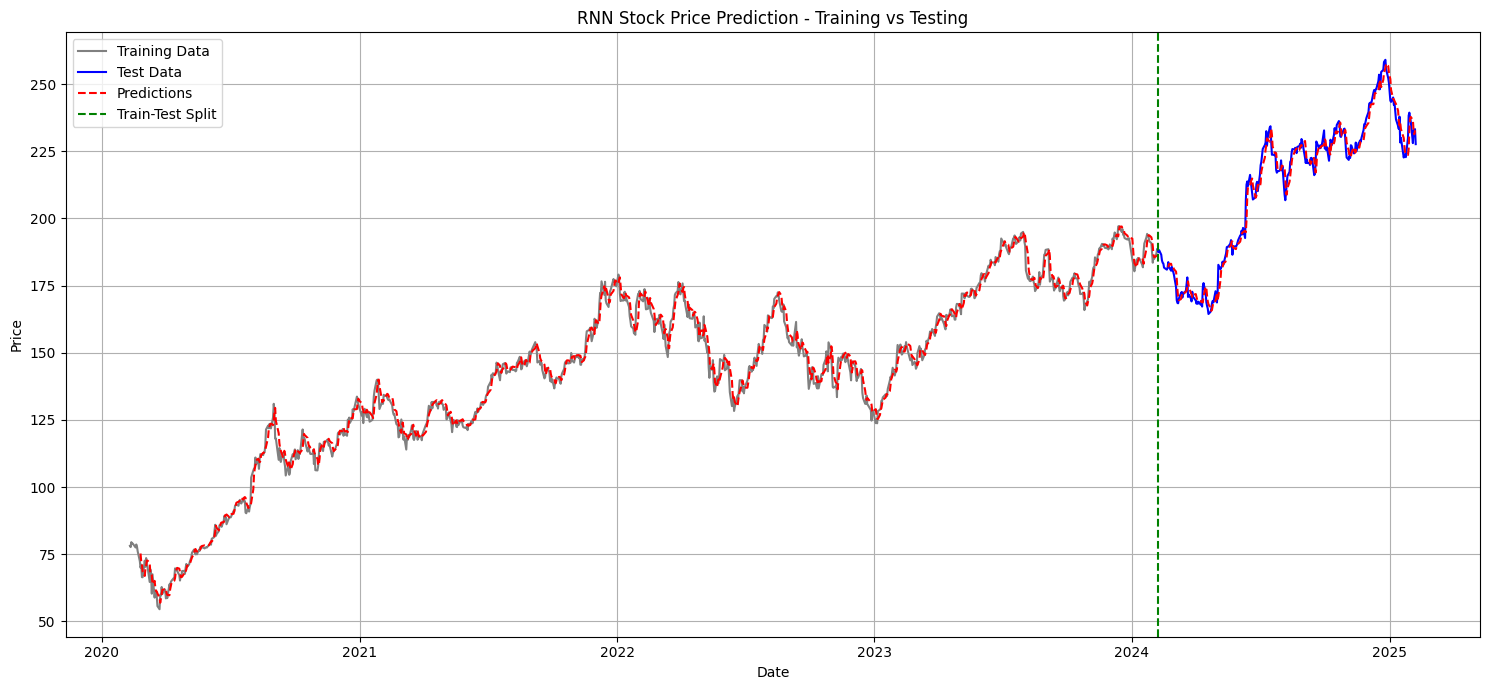

In [23]:
# Plotting
plt.figure(figsize=(15,7))

# Plot training data
plt.plot(df.index[:int(len(df) * train_size)], 
         df['Close'][:int(len(df) * train_size)], 
         label='Training Data', 
         color='gray')

# Plot test data
plt.plot(df.index[int(len(df) * train_size):], 
         df['Close'][int(len(df) * train_size):], 
         label='Test Data', 
         color='blue')
# Plot predictions
plt.plot(df.index[seq_length:], 
         df['Predicted_Close_RNN'][seq_length:], 
         label='Predictions', 
         color='red', 
         linestyle='--')

# Add vertical line to separate train and test sets
plt.axvline(x=df.index[int(len(df) * train_size)], 
            color='green', 
            linestyle='--', 
            label='Train-Test Split')
plt.legend()
plt.title("RNN Stock Price Prediction - Training vs Testing")
plt.xlabel("Date")
plt.ylabel("Price")
plt.grid(True)
plt.tight_layout()
plt.show()

**Calculation et affichage des metrics de  performence**

In [24]:
from sklearn.metrics import mean_squared_error, mean_absolute_error
import math

In [25]:
def calculate_metrics(actual, predicted):
    mse = mean_squared_error(actual, predicted)
    rmse = math.sqrt(mse)
    mae = mean_absolute_error(actual, predicted)
    return mse, rmse, mae

In [28]:
train_actual = df['Close'][seq_length:int(len(df) * train_size)]
train_pred_rnn = df['Predicted_Close_RNN'][seq_length:int(len(df) * train_size)]
train_mse_rnn, train_rmse_rnn, train_mae_rnn = calculate_metrics(train_actual, train_pred_rnn)

In [29]:
test_actual = df['Close'][int(len(df) * train_size) + seq_length:]
test_pred_rnn = df['Predicted_Close'][int(len(df) * train_size) + seq_length:].dropna()
test_mse_rnn, test_rmse_rnn, test_mae_rnn = calculate_metrics(test_actual, test_pred_rnn)

In [30]:
print("\nTraining Set Metrics:")
print(f"MSE: {train_mse_rnn:.2f}")
print(f"RMSE: {train_rmse_rnn:.2f}")
print(f"MAE: {train_mae_rnn:.2f}")

print("\nTest Set Metrics:")
print(f"MSE: {test_mse_rnn:.2f}")
print(f"RMSE: {test_rmse_rnn:.2f}")
print(f"MAE: {test_mae_rnn:.2f}")


Training Set Metrics:
MSE: 9.08
RMSE: 3.01
MAE: 2.30

Test Set Metrics:
MSE: 13.83
RMSE: 3.72
MAE: 2.82


<h1>LSTM</h1>

In [32]:
model_lstm = Sequential([
    LSTM(50, activation='relu', input_shape=(seq_length, 1)),
    Dense(1)
])

c:\Users\tufai\AppData\Local\Programs\Python\Python311\Lib\site-packages\keras\src\layers\rnn\rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [33]:
model_lstm.compile(optimizer='adam', loss='mse')

In [34]:
history_ltm = model_lstm.fit(
    X_train, y_train,
    epochs=20,
    verbose=1
)

Epoch 1/20
32/32 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.1211
Epoch 2/20
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.0046
Epoch 3/20
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 6.5147e-04
Epoch 4/20
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 4.7148e-04
Epoch 5/20
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 4.2791e-04
Epoch 6/20
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 4.5677e-04
Epoch 7/20
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 4.8004e-04
Epoch 8/20
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 4.3124e-04
Epoch 9/20
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 4.6602e-04
Epoch 10/20
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 4.1051e-04
Epoch 11/20
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 4.3276e-04
Epoch 12/20
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 4.4446e-04
Epoch 13/20
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 4.5726e-04
Epoch 14/20
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 4.0143e-04
Epoch 15/20
32/32 ━━━━━━━━━━━━━━━━━━━

In [42]:
train_predictions_lstm = model_lstm.predict(X_train)
test_predictions_lstm = model_lstm.predict(X_test)

32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step 


In [43]:
df['Predicted_Close_LSTM'] = np.nan
train_index = df.index[seq_length:int(len(df) * train_size)]
test_index = df.index[int(len(df) * train_size) + seq_length:]

In [44]:
train_predictions_lstm = scaler.inverse_transform(train_predictions_lstm)
test_predictions_lstm = scaler.inverse_transform(test_predictions_lstm)

In [45]:
df.loc[train_index, 'Predicted_Close_LSTM'] = train_predictions_lstm
df.loc[test_index, 'Predicted_Close_LSTM'] = test_predictions_lstm

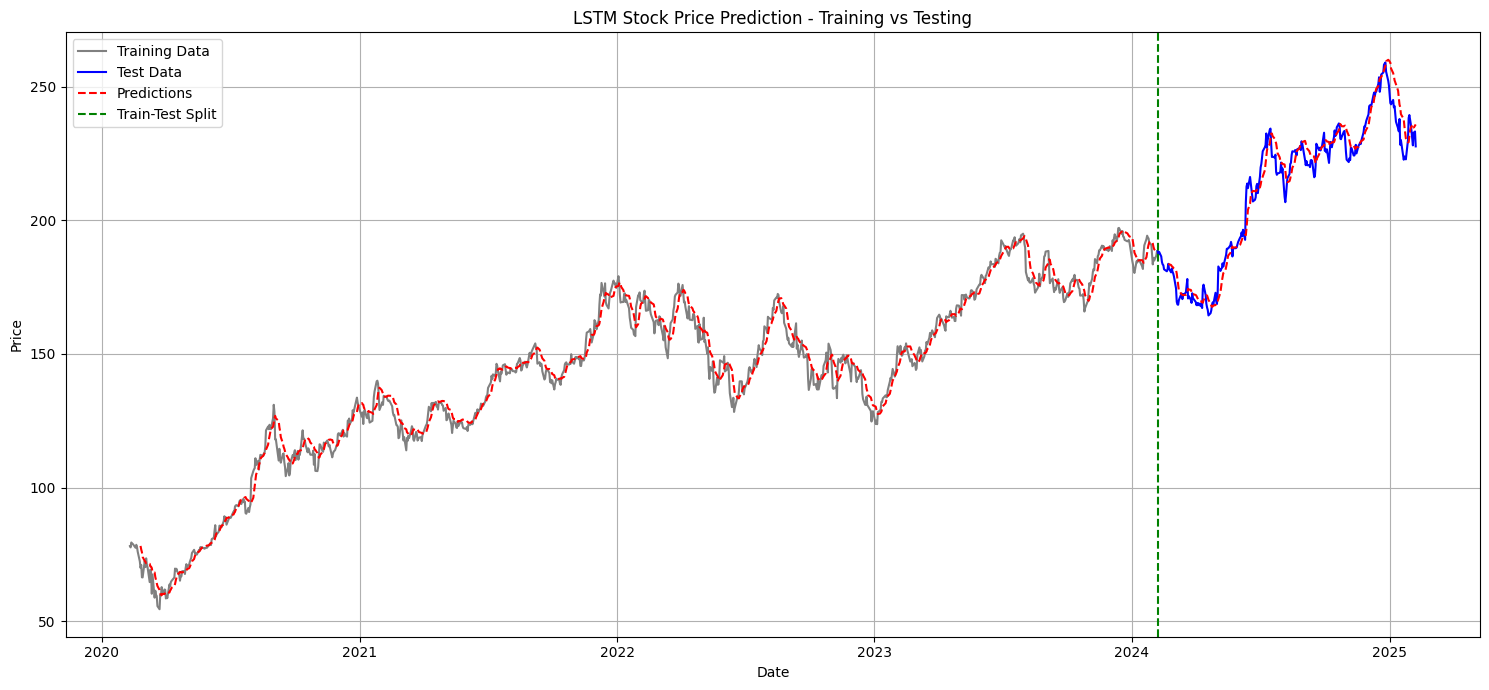

In [48]:
# Plotting
plt.figure(figsize=(15,7))

# Plot training data
plt.plot(df.index[:int(len(df) * train_size)], 
         df['Close'][:int(len(df) * train_size)], 
         label='Training Data', 
         color='gray')

# Plot test data
plt.plot(df.index[int(len(df) * train_size):], 
         df['Close'][int(len(df) * train_size):], 
         label='Test Data', 
         color='blue')
# Plot predictions
plt.plot(df.index[seq_length:], 
         df['Predicted_Close_LSTM'][seq_length:], 
         label='Predictions', 
         color='red', 
         linestyle='--')

# Add vertical line to separate train and test sets
plt.axvline(x=df.index[int(len(df) * train_size)], 
            color='green', 
            linestyle='--', 
            label='Train-Test Split')
plt.legend()
plt.title("LSTM Stock Price Prediction - Training vs Testing")
plt.xlabel("Date")
plt.ylabel("Price")
plt.grid(True)
plt.tight_layout()
plt.show()

In [49]:
train_actual = df['Close'][seq_length:int(len(df) * train_size)]
train_pred_lstm = df['Predicted_Close_LSTM'][seq_length:int(len(df) * train_size)]
train_mse_lstm, train_rmse_lstm, train_mae_lstm = calculate_metrics(train_actual, train_pred_lstm)

In [50]:
test_actual = df['Close'][int(len(df) * train_size) + seq_length:]
test_pred_lstm = df['Predicted_Close_LSTM'][int(len(df) * train_size) + seq_length:]
test_mse_lstm, test_rmse_lstm, test_mae_lstm = calculate_metrics(test_actual, test_pred_lstm)

In [51]:
print("\nTraining Set Metrics:")
print(f"MSE: {train_mse_lstm:.2f}")
print(f"RMSE: {train_rmse_lstm:.2f}")
print(f"MAE: {train_mae_lstm:.2f}")

print("\nTest Set Metrics:")
print(f"MSE: {test_mse_lstm:.2f}")
print(f"RMSE: {test_rmse_lstm:.2f}")
print(f"MAE: {test_mae_lstm:.2f}")


Training Set Metrics:
MSE: 16.20
RMSE: 4.02
MAE: 3.11

Test Set Metrics:
MSE: 30.42
RMSE: 5.52
MAE: 4.19


<h1>On remarque que RNN simple a un meilleur score par rapport au LSTM</h1>

**visualization de la difference**

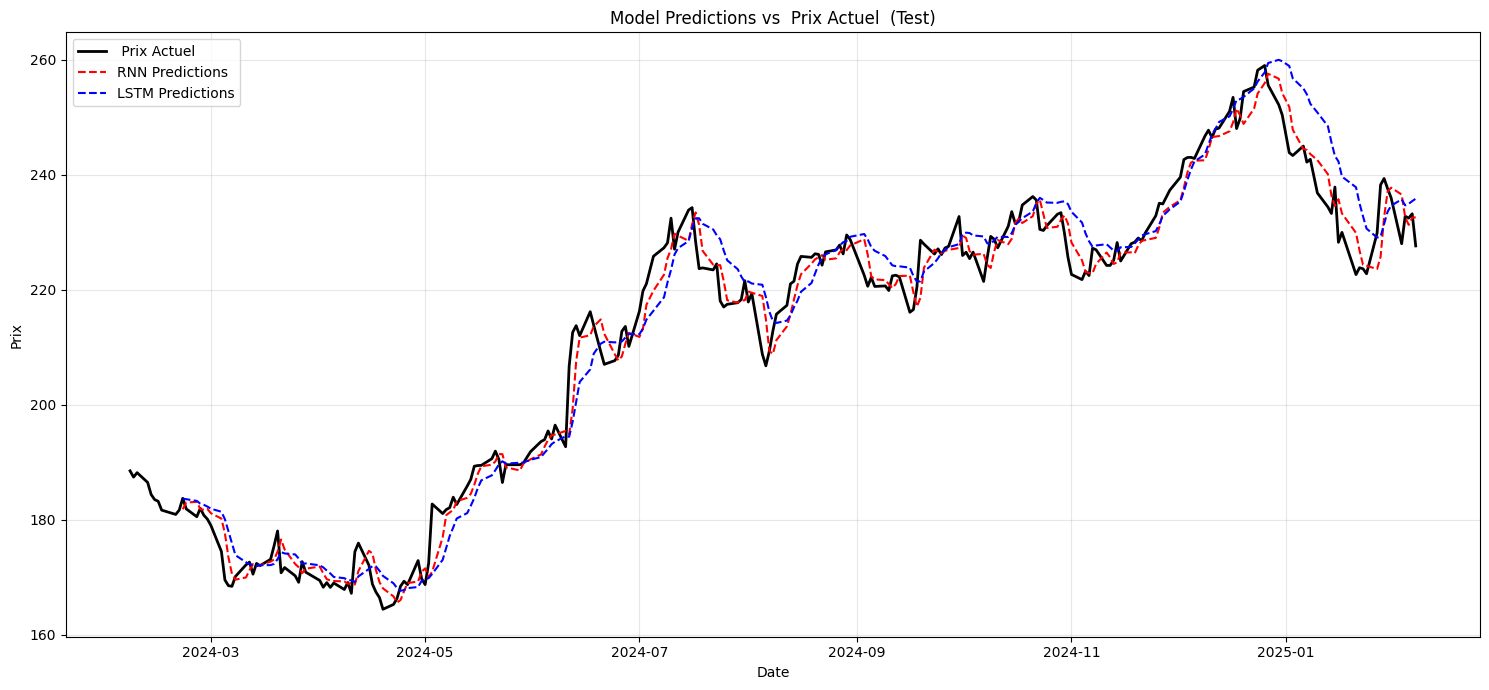

In [57]:
plt.figure(figsize=(15,7))

# Calculate test period start index
test_start_idx = int(len(df) * train_size)

# Plot actual test data
plt.plot(df.index[test_start_idx:], 
         df['Close'][test_start_idx:], 
         label=' Prix Actuel', 
         color='black',
         linewidth=2)

# Plot RNN predictions for test period only
plt.plot(df.index[test_start_idx:], 
         df['Predicted_Close_RNN'][test_start_idx:], 
         label='RNN Predictions', 
         color='red', 
         linestyle='--',
         linewidth=1.5)

# Plot LSTM predictions for test period only
plt.plot(df.index[test_start_idx:], 
         df['Predicted_Close_LSTM'][test_start_idx:], 
         label='LSTM Predictions', 
         color='blue',
         linestyle='--',
         linewidth=1.5)

plt.legend(loc='best')
plt.title("Model Predictions vs  Prix Actuel  (Test)")
plt.xlabel("Date")
plt.ylabel("Prix")
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()

**on Testera un nouveau type de Model c'est GRU**